<a href="https://colab.research.google.com/github/RudyJoshSamuel/Machine_Learning/blob/main/Simple_LR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [95]:
data = pd.read_csv('/content/placement.csv')
data

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [96]:
data.shape

(100, 4)

In [97]:
data.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [99]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [100]:
data = data.iloc[:,1:]
data.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


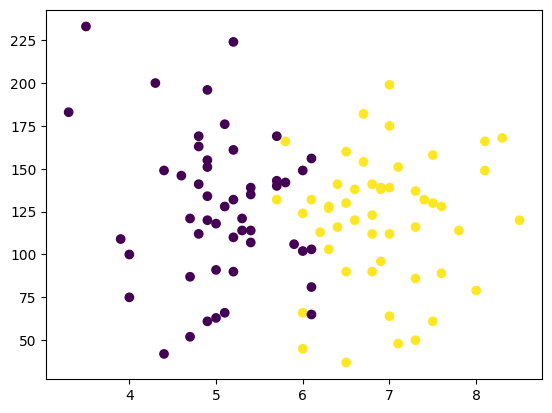

In [101]:
plt.scatter(data.cgpa,data.iq, c = data.placement)

In [102]:
# Splitting the data into x
X = data.iloc[:,0:2]
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [103]:
# Splitting the data into y
Y = data.iloc[:,-1]
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)

In [105]:
Y_train.shape

(90,)

In [106]:
Y_test.shape

(10,)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [108]:
X_train

array([[ 1.83409191,  0.60317313],
       [-1.34029793, -2.07852458],
       [ 0.20399983, -0.29908031],
       [ 0.54717711,  0.32748458],
       [ 0.80456007, -0.72514443],
       [-0.99712065,  0.95404947],
       [-0.99712065,  0.40267237],
       [ 0.03241119, -0.57476885],
       [-0.65394337, -0.37426809],
       [ 0.89035439, -0.3241429 ],
       [ 1.14773735, -0.97577038],
       [-2.11244681,  2.70843115],
       [ 0.71876575, -0.3241429 ],
       [-0.22497177,  0.45279756],
       [-0.91132633, -0.12364214],
       [ 0.28979415, -0.54970626],
       [ 0.03241119,  0.60317313],
       [ 0.63297143,  1.43023878],
       [-0.99712065, -0.3241429 ],
       [-0.65394337,  0.90392427],
       [ 0.46138279,  0.12698382],
       [ 0.11820551,  0.17710901],
       [-0.73973769,  1.27986321],
       [ 0.89035439,  1.25480061],
       [ 0.71876575, -0.87552   ],
       [-1.76926953, -0.39933069],
       [-0.82553201, -0.8504574 ],
       [-0.91132633,  0.7535487 ],
       [ 0.28979415,

In [109]:
X_test = scaler.transform(X_test)

In [110]:
X_test

array([[-0.91132633, -1.60233527],
       [ 0.37558847,  0.40267237],
       [-0.73973769, -1.47702229],
       [-0.65394337, -0.87552   ],
       [ 0.97614871,  0.65329832],
       [ 0.80456007,  0.32748458],
       [ 0.46138279,  0.87886168],
       [ 0.54717711, -0.12364214],
       [ 0.89035439, -1.52714748],
       [ 0.71876575, -0.04845435]])

In [111]:
## MODEL TRAINING
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)

LogisticRegression()

In [112]:
# MODEL EVALUATION
Y_pred = clf.predict(X_test)

In [113]:
y_test

87    1
15    0
10    1
28    0
39    0
24    0
3     1
85    1
16    0
23    0
67    0
91    1
51    0
43    1
29    1
20    1
8     0
61    1
42    1
30    1
96    0
0     1
75    0
80    0
31    0
Name: placement, dtype: int64

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

1.0

<Axes: >

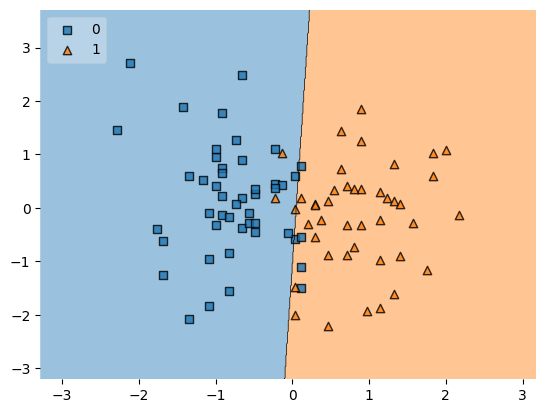

In [116]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, Y_train.values, clf= clf, legend =2)

In [117]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))